## 4-2. 스크래핑 결과 시각화하기 I - 해시코드 질문태그 빈도 시각화

- bs4와 Seaborn을 이용해서 질문의 주제 빈도를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 태그의 빈도 확인

이전에 진행한 해시코드(https://hashcode.co.kr) 사이트에선 다양한 질문이 올라왔는데,  
질문제목 아래에 "태그"가 있었습니다.

이 태그의 빈도를 측정하면 어떤 주제의 질문이 많이 올라오는지 알 수 있을 것 같습니다.  
이를 스크래핑 후 시각화해봅시다.

In [1]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [11]:
# 필요한 라이브러리를 불러온 후, 요청을 진행해봅시다.
# 응답을 바탕으로 BeautifulSoup 객체를 생성해봅시다.
# 질문의 빈도를 체크하는 dict를 만든 후, 빈도를 체크해봅시다.



frequency = {}
import time
import requests
from bs4 import BeautifulSoup
for i in range(1,11) :
    res = requests.get("https://hashcode.co.kr/?page={}".format(i), user_agent)
    soup = BeautifulSoup(res.text, "html.parser" )

    # 1. ul 태그를 모두 찾기
    # 2. 1번 안에 있는 li 태그의 text 추출
    # print(soup)
    ul_tags = soup.find_all("ul", "question-tags")
    # print(ul_tags)
    for ul in ul_tags:
        li_tags = ul.find_all("li")
        for li in li_tags :
            tag = li.text.strip()
            if tag not in frequency :
                frequency[tag] = 1
            else :
                frequency[tag] += 1
    time.sleep(0.1)

print(frequency)

{'python': 234, 'vim': 1, 'c': 43, 'struct': 2, 'generic': 1, 'java': 44, 'deep-learning': 1, 'keyerror': 2, 'pandas': 21, 'dataframe': 10, 'android': 5, 'code': 2, 'matplotlib': 1, 'beautifulsoup': 6, 'replace': 1, 'ai': 3, 'gui': 3, 'tkinter': 4, 'software_development': 1, 'javac': 1, 'ubuntu': 3, 'vmware': 1, 'multithreading': 1, 'algorithm': 6, 'coding-test': 4, 'bfs': 1, 'react': 7, 'javascript': 16, 'arduino': 4, 'node.js': 8, 'regex': 3, 'multiprocessing': 1, 'pygame': 1, 'html': 13, 'css': 7, 'application-development': 1, 'logistic-regression': 2, 'logistic': 1, 'error': 7, 'csv': 4, 'class': 8, 'instance': 1, 'hashmap': 1, 'object': 1, 'windows': 2, 'for': 6, 'selenium-webdrive': 6, 'c++': 21, 'mfc': 1, 'win32': 1, 'django': 4, 'recursive': 4, 'flatten': 1, 'python3': 9, 'dictionary': 4, 'array': 3, 'initialization': 2, 'qt': 2, 'pdf': 1, 'hashcode': 1, 'kotlin': 4, 'private': 2, 'image': 3, 'netlify': 1, 'data': 2, 'directory': 1, 'cv2': 1, 'raspberry-pi': 2, 'dom': 1, 'async

In [12]:
# Counter를 사용해 가장 빈도가 높은 value들을 추출합니다.
from collections import Counter

counter = Counter(frequency)

counter.most_common(10)


[('python', 234),
 ('java', 44),
 ('c', 43),
 ('pandas', 21),
 ('c++', 21),
 ('javascript', 16),
 ('html', 13),
 ('dataframe', 10),
 ('python3', 9),
 ('crawling', 9)]

<AxesSubplot:>

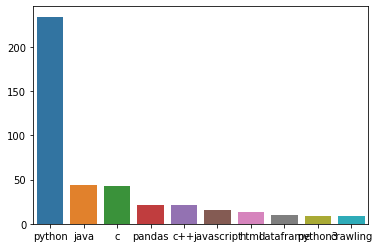

In [15]:
# Seaborn을 이용해 이를 Barplot으로 그립니다.

import seaborn as sns

x = [elem[0] for elem in counter.most_common(10)]
y = [elem[1] for elem in counter.most_common(10)]

sns.barplot(x = x,  y = y )

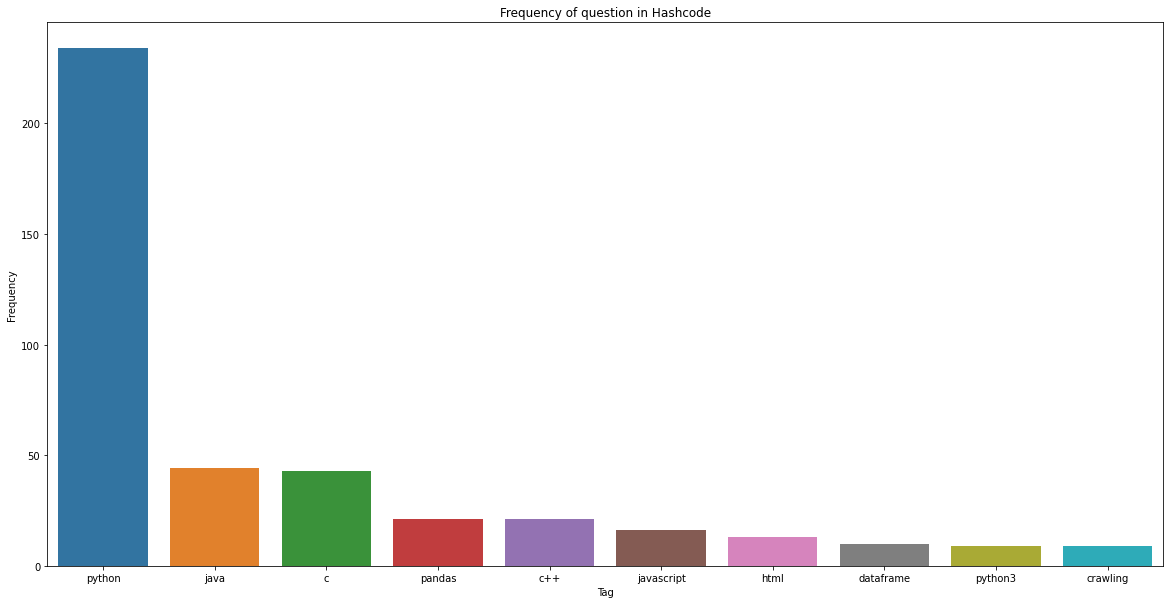

In [18]:
# figure, xlabel, ylabel, title을 적절하게 설정해서 시각화를 완성해봅시다.

import matplotlib.pyplot as plt

plt.figure(figsize =(20,10))
plt.title("Frequency of question in Hashcode")
plt.xlabel("Tag")
plt.ylabel("Frequency")


sns.barplot(x = x, y= y )

plt.show()